# **Detection of COVID - 19** 

A Multi-Model Neural Network Classification :
*   Classifier 1 : Chest CT - Scan
*   Classifier 2 : Chest X - Ray




#**Classifier  1 : Chest CT - Scan**


-------

##Download Dataset From Kaggle
---


In [ ]:
#Uploading Kaggle.json of my kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shiv1908","key":"57d703323bf265248b12dd33f72ba426"}'}

In [ ]:
#Changing permission and moving kaggle.json to download dataset
!mkdir -p ~/.kaggle
!cp  kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Changing the Working Directory to avoid the DataSet moving step
%cd /content/drive/My\ Drive/75

/content/drive/My Drive/75


In [ ]:
#Downloading Kaggle dataset in pwd , using API
!kaggle datasets download -d azaemon/preprocessed-ct-scans-for-covid19

100% 3.58G/3.59G [01:37<00:00, 79.9MB/s]
100% 3.59G/3.59G [01:37<00:00, 39.4MB/s]


##Data Visualization

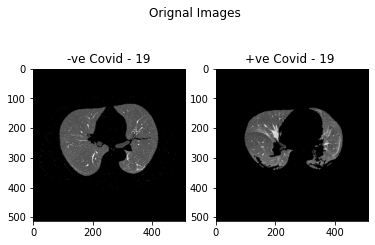

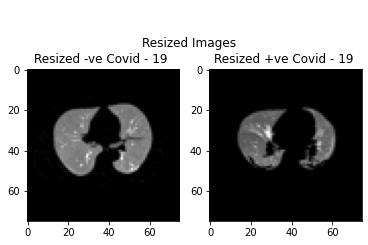

In [ ]:
%matplotlib inline

#Plotting images to decide the resize , parameters 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 
nimg = Image.open("/content/drive/My Drive/75/Preprocessed CT scans/1/nCT100.jpg")
pimg = Image.open("/content/drive/My Drive/75/Preprocessed CT scans/2/pCT1002.jpg")




fig = plt.figure()
fig.suptitle("Orignal Images\n\n")
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(nimg, cmap='gray')
ax.set_title('-ve Covid - 19')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('+ve Covid - 19 ')
imgplot = plt.imshow(pimg, cmap='gray')






fig1 = plt.figure()

fig1.suptitle("\n\nResized Images\n\n\n")
ax = fig1.add_subplot(1, 2, 1 )
nr  = nimg.resize((75,75))
imgplot = plt.imshow(nr, cmap='gray')

ax.set_title('Resized -ve Covid - 19 ')


ax = fig1.add_subplot(1, 2, 2 )
ax.set_title('Resized +ve Covid - 19 ')
pr  = pimg.resize((75,75))
imgplot = plt.imshow(pr, cmap='gray')



## Data Preprocessing

---


In [ ]:
#Extracting the dataset zip
from zipfile import ZipFile
filename = "/content/drive/My Drive/75/preprocessed-ct-scans-for-covid19.zip"

with ZipFile(filename,"r") as zip:
    zip.extractall()
    print("Zip Extraction Complete")

Zip Extraction Complete


In [ ]:
#Creating Dataset 
import os
import cv2
import numpy as np

def get_dataset(img_folder):
    
    #making list to store data and it's respective label
    img_data_array=[]
    class_name=[]
    
    #Looping over Images of both the lables
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            print(os.path.join(img_folder, dir1))
            image_path= os.path.join(img_folder, dir1,  file)
            print(image_path)
            image= cv2.imread( image_path) #, cv2.COLOR_BGR2RGB)
            if image is None:
                continue
            print(image.shape)
            #print(image.mode)
            #Data Preprocessing - Resizing the Image
            image=cv2.resize(image, (75, 75) ,interpolation = cv2.INTER_AREA)
            #Adding the Image to List
            img_data_array.append(image)
            #Adding the respective label of the Image 
            
            class_name.append(dir1)
    #Returning Numpy array of Images, and Numpy array of respective labels        
    return np.array(img_data_array), np.array(class_name).reshape(len(class_name),1)

In [ ]:
#Removing the unwanted data
!rm -rf /content/drive/My\ Drive/75/Preprocessed\ CT\ scans/NiCT

In [ ]:
#Getting Dataset in X and Y , after preprocessing
X , Y = get_dataset("/content/drive/My Drive/75/Preprocessed CT scans")

Streaming output truncated to the last 5000 lines.
(512, 512, 3)
/content/drive/My Drive/75/Preprocessed CT scans/2
/content/drive/My Drive/75/Preprocessed CT scans/2/pCT310.jpg
(512, 512, 3)
/content/drive/My Drive/75/Preprocessed CT scans/2
/content/drive/My Drive/75/Preprocessed CT scans/2/pCT3100.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Preprocessed CT scans/2
/content/drive/My Drive/75/Preprocessed CT scans/2/pCT3101.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Preprocessed CT scans/2
/content/drive/My Drive/75/Preprocessed CT scans/2/pCT3102.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Preprocessed CT scans/2
/content/drive/My Drive/75/Preprocessed CT scans/2/pCT3103.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Preprocessed CT scans/2
/content/drive/My Drive/75/Preprocessed CT scans/2/pCT3104.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Preprocessed CT scans/2
/content/drive/My Drive/75/Preprocessed CT scans/2/pCT3105.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/P

In [ ]:
#Getting Dataset in X and Y , after preprocessing
X , Y = get_dataset("/content/drive/My Drive/75/Original CT Scans")

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/75/Original CT Scans/0/NiCT4565.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Original CT Scans/0
/content/drive/My Drive/75/Original CT Scans/0/NiCT4566.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Original CT Scans/0
/content/drive/My Drive/75/Original CT Scans/0/NiCT4567.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Original CT Scans/0
/content/drive/My Drive/75/Original CT Scans/0/NiCT4568.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Original CT Scans/0
/content/drive/My Drive/75/Original CT Scans/0/NiCT4569.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Original CT Scans/0
/content/drive/My Drive/75/Original CT Scans/0/NiCT457.jpg
(512, 512, 3)
/content/drive/My Drive/75/Original CT Scans/0
/content/drive/My Drive/75/Original CT Scans/0/NiCT4570.jpg
(1211, 1211, 3)
/content/drive/My Drive/75/Original CT Scans/0
/content/drive/My Drive/75/Original CT Scans/0/NiCT4571.jpg
(1211, 1211, 3)
/content/drive/

In [ ]:
#Verifying the Dataset structure
print('Number of data points :', X.shape[0])
print('Shape of feature set X :', X.shape)
X = X.reshape(X.shape[0],75*75*3)
print('Shape of feature set X after reshape :', X.shape)


Number of data points : 13980
Shape of feature set X : (13980, 75, 75, 3)
Shape of feature set X after reshape : (13980, 16875)


In [ ]:
#Verifying the Dataset structure
print('Number of data points :', X.shape[0])
print('Shape of feature set X :', X.shape)
X = X.reshape(X.shape[0],75*75*3)
print('Shape of feature set X after reshape :', X.shape)


In [ ]:
print('Shape of label set Y :', Y.shape)

In [ ]:
#Writing the Data to CSV , 
#Reason 1 - Making Processed Data Set Portable
# Reason 2 - Google Colab Crashes Randomly so next time CSV can be used and Create Data Set can be avoided as it takes much time
import csv

with open("/content/drive/My Drive/data75.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(X)


with open("/content/drive/My Drive/labels75.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(Y)

print("CSV Written")

In [ ]:
#Writing the Data to CSV , 
#Reason 1 - Making Processed Data Set Portable
# Reason 2 - Google Colab Crashes Randomly so next time CSV can be used and Create Data Set can be avoided as it takes much time
import csv

with open("/content/drive/My Drive/3data75.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(X)


with open("/content/drive/My Drive/3labels75.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(Y)

print("CSV Written")

CSV Written


In [ ]:
#Downloading the CSV
from google.colab import files
files.download('/content/drive/My Drive/3data75.csv')
files.download("/content/drive/My Drive/3labels75.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Reading

---


In [ ]:
#Importing Pandas to read the Dataset CSV
import pandas as pd


#Taking data in X, in dataframe so that normalization can be performed
X =pd.read_csv("/content/drive/My Drive/3data75.csv", sep=',',header=None)

#Taking Labels in numpy array as no processing of labels is required now
Y = pd.read_csv("/content/drive/My Drive/3labels75.csv", sep=',',header=None).to_numpy()


#Verifying Structre
print('X :\n', X.values)
print('Shape of X :', X.values.shape)
print('Y :\n', Y)
print('Shape of y :', Y.shape)

X :
 [[56 56 56 ... 56 56 56]
 [62 62 62 ... 50 50 50]
 [ 0  0  0 ...  0  0  0]
 ...
 [38 38 38 ... 38 38 38]
 [44 44 44 ... 53 53 53]
 [45 45 45 ... 38 38 38]]
Shape of X : (19682, 16875)
Y :
 [[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]
Shape of y : (19682, 1)


In [ ]:
import pandas as pd


#Taking data in X, in dataframe so that normalization can be performed
X =pd.read_csv("/content/drive/My Drive/75/data75.csv", sep=',',header=None)

#Taking Labels in numpy array as no processing of labels is required now
Y = pd.read_csv("/content/drive/My Drive/75/labels75.csv", sep=',',header=None).to_numpy()


#Verifying Structre
print('X :\n', X.values)
print('Shape of X :', X.values.shape)
print('Y :\n', Y)
print('Shape of y :', Y.shape)

In [ ]:
#Shuffling the Data as  Label 2 has only 4001 Images and Label 1 has 9001 images, this can make model biased for Label 1
from sklearn.utils import shuffle
X, Y  = shuffle(X , Y , random_state = 9099)

## Normalization

### Normalization 1

In [ ]:
#Normalization Using normalize() function It does standard normalization, μ=0 and σ=1

from sklearn.preprocessing import normalize
X = normalize(X)
print(X)
print()
print(type(Y))

[[0.00229528 0.00229528 0.00229528 ... 0.00229528 0.00229528 0.00229528]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00321272 0.00321272 0.00321272 ... 0.00418164 0.00418164 0.00418164]
 ...
 [0.00288177 0.00288177 0.00288177 ... 0.00288177 0.00288177 0.00288177]
 [0.00226863 0.00226863 0.00226863 ... 0.00226863 0.00226863 0.00226863]
 [0.         0.         0.         ... 0.         0.         0.        ]]
<class 'numpy.ndarray'>


### Normalization 2

In [ ]:
#In this approach, the data is scaled to a fixed range  usually 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

## Data Splitting

In [ ]:
#Splitting the data in 60-20-20 --> Training, Testing, Validation
from sklearn.model_selection import train_test_split

#Taking only 6000 Images as we have shuffled to avoid the biasness of the model
(trainX, testX, trainY, testY) = train_test_split(X[:6000], Y[:6000], test_size=0.20, random_state=0)

(valX,testX,valY,testY) = train_test_split(testX , testY , test_size = 0.5)


In [ ]:
print(trainX)
print(testX)
print(valX)

[[0.00426313 0.00426313 0.00426313 ... 0.00426313 0.00426313 0.00426313]
 [0.0023035  0.0023035  0.0023035  ... 0.01169938 0.01169938 0.01169938]
 [0.00306892 0.00306892 0.00306892 ... 0.00399447 0.00399447 0.00399447]
 ...
 [0.00305759 0.00305759 0.00305759 ... 0.00275685 0.00275685 0.00275685]
 [0.00298248 0.00298248 0.00298248 ... 0.00289071 0.00289071 0.00289071]
 [0.00287075 0.00287075 0.00287075 ... 0.00348255 0.00348255 0.00348255]]
[[0.0030267  0.0030267  0.0030267  ... 0.00270241 0.00270241 0.00270241]
 [0.0024075  0.0024075  0.0024075  ... 0.002247   0.002247   0.002247  ]
 [0.00306846 0.00306846 0.00306846 ... 0.00394516 0.00394516 0.00394516]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00294991 0.00294991 0.00294991 ... 0.00294991 0.00294991 0.00294991]
 [0.00263067 0.00263067 0.00263067 ... 0.00263067 0.00263067 0.00263067]]
[[0.0023827  0.0023827  0.0023827  ... 0.00222731 0.00222731 0.00222731]
 [0.         0.         0.         ... 

In [ ]:
trainY
testY
valY

array([[1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
    

##Artificial Neural Network

---

First create a FeedForward Neural Network Class.</br>
Second, try with different hyperparameters such as activation functions , Weight initilization ,Loss- Function ,etc.</br>
Third, Try for more Neural NEtwork Architectures with the best fit obtained from step 2.</br>
Fourth, Use the tunned hyperparamters from above steps to get the best fit and highest accuracy for Dataset

The main Hyperparametrs are :</br></br>

---


initialization - a list specifying the initalization
['normal', k] - standard normal random variables divided by k
['uniform', a, b] - uniform random variables between a and b
'Nielsen' - standard normal random variables divided by the number of nodes in the next layer
['LeCun', 'uniform' or 'normal'] - normal or uniform random variables centered at 0 with standard deviation sqrt(3/nodes in previous
layer) or lower/upper bounds of +/- the same, respectively
['Glorot', 'uniform' or 'normal'] - normal or uniform random variables centered at 0 with standard deviation sqrt(1/mean of nodes in previous and next Layers) or lower/upper bounds of +/- the same, respectively
['He', 'uniform' or 'normal'] - normal or uniform random variables centered at 0 with standard deviation sqrt(6/nodes in previous layer) or lower/upper bounds of +/- the same, respectively</br></br>

activations - string to choose which activation functions to use:
'sig' - sig function
'ReLU' - rectified linear unit
'ELU' - exponential linear unit</br></br>
loss - string to choose which loss function to use:
'sum-of-squares'
'cross-entropy'


In [ ]:
#Declaring a common FeedForward Neural Network Class
#This Class has hyper parameters such as , Layers which defines the architecture , L 1 and lamb 2 for L1 and L2 regularization , momentum, learning rate, weight Initilization, loss 


class FeedforwardNeuralNetwork:
    
    def __init__(self, Layers, alpha = 0.1, annealing = 'none', lambda1 = 0, lambda2 = 0, batchSize = 32, gamma = 0.0,
                 initialization = 'normal', activations = 'sigmoid', loss = 'sum-of-squares'):
        # Creating a list to append data
        self.W = []                     
        self.Layers = layers            
        self.alpha = alpha              
        self.annealing = annealing      
        self.lambda1 = lambda1          
        self.lambda2 = lambda2         
        self.batchSize = batchSize      
        self.gamma = gamma              
        self.activation = activations   
        self.loss = loss               

       
        #Different Initialization Functions
        if initialization[0] == 'normal':
            for i in np.arange(0, len(layers) - 2):
                self.W.append(np.random.normal(0.0, 1.0, size=(layers[i] + 1, layers[i + 1] + 1))/initialization[1])

            
            self.W.append(np.random.normal(0.0, 1.0, size=(layers[-2] + 1, layers[-1]))/initialization[1])
            
        if initialization[0] == 'uniform':
            
            for i in np.arange(0, len(layers) - 2):
                self.W.append(np.random.uniform(initialization[1], initialization[2], size=(layers[i] + 1, layers[i + 1] + 1)))

            
            self.W.append(np.random.uniform(initialization[1], initialization[2], size=(layers[-2] + 1, layers[-1])))
            
        if initialization == 'Nielsen':
            
            for i in np.arange(0, len(layers) - 2):
                self.W.append(np.random.normal(0.0, 1.0, size=(layers[i] + 1, layers[i + 1] + 1))/layers[i+1])

            
            self.W.append(np.random.normal(0.0, 1.0, size=(layers[-2] + 1, layers[-1]))/layers[-1])
            
        
        if initialization[0] in ['LeCun', 'Glorot', 'He']:
            
            for i in np.arange(0, len(layers) - 2):
                
                
                if initialization[0] == 'LeCun':
                    limit = np.sqrt(1.0 / layers[i+1])
                    
                
                elif initialization[0] == 'Glorot':
                    mean = (layers[i] + layers[i+1])/2.0
                    limit = np.sqrt(1.0 / mean)
                    
                
                elif initialization[0] == 'He':
                    limit = np.sqrt(2.0 / layers[i+1])
                
                
                if initialization[1] == 'normal':
                    self.W.append(np.random.normal(0.0, limit, size=(layers[i] + 1, layers[i + 1] + 1)))
                    
                elif initialization[1] == 'uniform':
                    limit *= np.sqrt(3.0)
                    self.W.append(np.random.uniform(-limit, limit, size=(layers[i] + 1, layers[i + 1] + 1)))

            
            if initialization[0] == 'LeCun':
                limit = np.sqrt(1.0 / layers[-2])
                
            elif initialization[0] == 'Glorot':
                mean = (layers[-2] + layers[-1])/2.0
                limit = np.sqrt(1.0 / mean)
                    
            elif initialization[0] == 'He':
                limit = np.sqrt(2.0 / layers[-2])
            
            
            if initialization[1] == 'normal':
                self.W.append(np.random.normal(0.0, limit, size=(layers[-2] + 1, layers[-1])))
                
            elif initialization[1] == 'uniform':
                limit *= np.sqrt(3.0)
                self.W.append(np.random.uniform(-limit, limit, size=(layers[-2] + 1, layers[-1])))
        
    #Activation Functions
    def activate(self, x):
        # Sigmoid
        if self.activation == 'sigmoid':
            return 1.0 / (1 + np.exp(-x))

        # ReLU
        if self.activation == 'ReLU':
            return x*(x >= 0)
        
        # ELU
        if self.activation == 'ELU':
            return x*(x >= 0) + 0.1*(np.exp(x) - 1)*(x < 0)
    
    # activation function derivatives 
    def activationDerivative(self, x):
        # Sigmoid
        if self.activation == 'sigmoid':
            return self.activate(x) * (1 - self.activate(x))
        
        # ReLU
        if self.activation == 'ReLU':
            return x >= 0
        
        # ELU
        if self.activation == 'ELU':
            return 1*(x >= 0) + 0.1*np.exp(x)*(x < 0)
    
    #Specifying Batch
    def getNextBatch(self, X, y, batchSize):
        for i in np.arange(0, X.shape[0], batchSize):
            yield (X[i:i + batchSize], y[i:i + batchSize])
    
    # fit the model
    def fit(self, X, y, testX, testY, epochs = 10000, update = 1000, printPerformance = True):
        trainX = X
       
        # column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))
        losses = []
        trainAccuracies = []
        testAccuracies = []
        trainY = y
        
        numberOfExamples = X.shape[0]
        
        # precaution to make sure that data is in perfect shape
        y = LabelBinarizer().fit_transform(y)
        
        v = []
        for layer in np.arange(0,len(self.W)):
            v.append(np.zeros(self.W[layer].shape))
            
        alpha = self.alpha

        for epoch in np.arange(0,epochs):
            
            if self.annealing[0] == 'step':
                stepSize = self.alpha/self.annealing[1]
                if epochs > 0 and epoch % self.annealing[1] == 0:
                    alpha -= stepSize
                    print(alpha)
                
            elif self.annealing[0] == 'exp':
                alpha = self.alpha * np.exp(-self.annealing[1] * epoch)
                    
            elif self.annealing[0] == 'inv':
                alpha = self.alpha / (1 + self.annealing[1] * epoch)
            
            
            p = np.arange(0,X.shape[0])
            np.random.shuffle(p)
            X = X[p]
            y = y[p]

            # feed forward, backprop, and weight update
            for (x, target) in self.getNextBatch(X, y, self.batchSize):
                # Appending the values in the list
                A = [np.atleast_2d(x)]
                Z = [np.atleast_2d(x)]
                
                
                for layer in np.arange(0, len(self.W)):
                    
                    
                    net = A[layer].dot(self.W[layer])
                    out = self.activate(net)
                    
                    
                    A.append(out)
                    Z.append(net)
                    
                # backpropagation 
                error = A[-1] - target
                
                if self.loss == 'sum-of-squares':
                    D = [error * self.activationDerivative(Z[-1])]
                    
                if self.loss == 'cross-entropy':
                    D = [error]
                
                 # Creating deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.activationDerivative(Z[layer])
                    D.append(delta)
                    
                
                D = D[::-1]
                
                 # Updating the Weights
                for layer in np.arange(0, len(self.W)):
                    gradient = (A[layer].T.dot(D[layer])
                                + (self.lambda1 / numberOfExamples) * np.sign(self.W[layer])
                                + (self.lambda2 / numberOfExamples) * self.W[layer])
                    
                    v[layer] = self.gamma * v[layer] + alpha * gradient
                    self.W[layer] -= v[layer]
              
            
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)

                 # For Accuracy Computation
                if printPerformance:
                    predictedY = self.predict(testX)
                    predictedY = predictedY.argmax(axis=1)
                    testAccuracy = accuracy_score(testY, predictedY)           

                    predictedY = self.predict(trainX)
                    predictedY = predictedY.argmax(axis=1)
                    trainAccuracy = accuracy_score(trainY, predictedY)

                    testAccuracies.append(testAccuracy)
                    trainAccuracies.append(trainAccuracy)
                    losses.append(loss)
                    print("[INFO] epoch = {}, loss = {:.6f}, training accuracy = {:.6f}, test accuracy = {:.6f}".format(epoch + 1, loss, trainAccuracy, testAccuracy))
                    
                
                else:
                    losses.append(loss)
                    print("[INFO] epoch = {}, loss = {:.6f}".format(epoch + 1, loss))

        
        if printPerformance:
            fig, ax1 = plt.subplots()

            # To plot the performances
            p1 = ax1.plot(np.arange(0, epochs, update), losses, label = 'Loss')
            ax1.set_xlabel('Training Epoch')
            ax1.set_ylabel('Loss')

            
            ax2 = ax1.twinx()
            
             # accuracy plot
            p2 = ax2.plot(np.arange(0, epochs, update), trainAccuracies, label = 'Accuracy (train)', color = 'tab:orange')
            p3 = ax2.plot(np.arange(0, epochs, update), testAccuracies, label = 'Accuracy (test)', color = 'tab:green')
            ax2.set_ylabel('Accuracy')

            
            ps = p1 + p2 + p3
            labs = [p.get_label() for p in ps]
            ax1.legend(ps, labs, loc=0)
            
    # feed predict data
    def predict(self, X, addOnes = True):
        
        p = np.atleast_2d(X)
        
        # column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward
        for layer in np.arange(0, len(self.W)):
            p = self.activate(np.dot(p, self.W[layer]))
            
        return p
    
    # Compute loss function
    def computeLoss(self, X, y):
       
        y = np.atleast_2d(y)
        
        
        predictions = self.predict(X, addOnes = False)
        
       
        if self.loss == 'sum-of-squares':
            loss = np.sum((predictions - y)**2) / 2.0
            
        
        if self.loss == 'cross-entropy':
            loss = np.sum(np.nan_to_num(-y*np.log(predictions)-(1-y)*np.log(1-predictions)))
            
        
        if self.lambda1 != 0:
            
            L1penalty = 0

            for layer in np.arange(0,len(self.W)):
                L1penalty += np.sum(np.abs(self.W[layer]))
        
             # Adding L1 penalty to the loss
            loss = loss + (self.lambda1 / X.shape[0]) * L1penalty
            
        
        if self.lambda2 != 0:
            
            L2penalty = 0

            for layer in np.arange(0,len(self.W)):
                L2penalty += np.sum(self.W[layer] ** 2)
        
            # Addingn L2 penalty to the loss
            loss = loss + (self.lambda2 / X.shape[0]) * L2penalty
        
        return loss

##Architectures , Tunning -  Hyperparameters, Regularization
---


###Architecture 1 

[INFO] epoch = 1, loss = 5756.732614, training accuracy = 0.712708, test accuracy = 0.705000
[INFO] epoch = 2, loss = 5758.643399, training accuracy = 0.533958, test accuracy = 0.506667
[INFO] epoch = 3, loss = 5755.839304, training accuracy = 0.336042, test accuracy = 0.335000
[INFO] epoch = 4, loss = 5751.059312, training accuracy = 0.332708, test accuracy = 0.331667
[INFO] epoch = 5, loss = 5752.019347, training accuracy = 0.333333, test accuracy = 0.331667
[INFO] epoch = 6, loss = 5750.036598, training accuracy = 0.330417, test accuracy = 0.328333
[INFO] epoch = 7, loss = 5747.118697, training accuracy = 0.330833, test accuracy = 0.331667
[INFO] epoch = 8, loss = 5745.840644, training accuracy = 0.330625, test accuracy = 0.331667
[INFO] epoch = 9, loss = 5742.744993, training accuracy = 0.336875, test accuracy = 0.335000
[INFO] epoch = 10, loss = 5741.472709, training accuracy = 0.341667, test accuracy = 0.338333
Trainig Time :  26.651099681854248 seconds
Training set accuracy
0.52

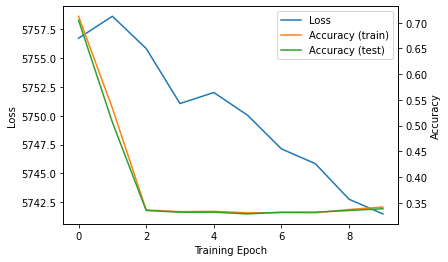

In [ ]:


import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os


#Trying Simple Architecture to decide , the future path
layers = [(75*75*3), 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.001, 'none', 0, 0, 32, 0, ['normal', 1000], 'sigmoid', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Trainig Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))


###Architecture 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in multiply


[INFO] epoch = 1, loss = 6.566260, training accuracy = 0.165417, test accuracy = 0.163333
[INFO] epoch = 2, loss = 6.442808, training accuracy = 0.172500, test accuracy = 0.168333
[INFO] epoch = 3, loss = 6.322797, training accuracy = 0.179167, test accuracy = 0.176667
[INFO] epoch = 4, loss = 6.206187, training accuracy = 0.185625, test accuracy = 0.185000
[INFO] epoch = 5, loss = 6.092735, training accuracy = 0.189792, test accuracy = 0.191667
[INFO] epoch = 6, loss = 5.982301, training accuracy = 0.195833, test accuracy = 0.196667
[INFO] epoch = 7, loss = 5.874807, training accuracy = 0.201875, test accuracy = 0.201667
[INFO] epoch = 8, loss = 5.770225, training accuracy = 0.208333, test accuracy = 0.208333
[INFO] epoch = 9, loss = 5.668437, training accuracy = 0.213333, test accuracy = 0.215000
[INFO] epoch = 10, loss = 5.569394, training accuracy = 0.220208, test accuracy = 0.216667
Training Time :  77.8914361000061 seconds
Training set accuracy
0.22020833333333334
Test set accura

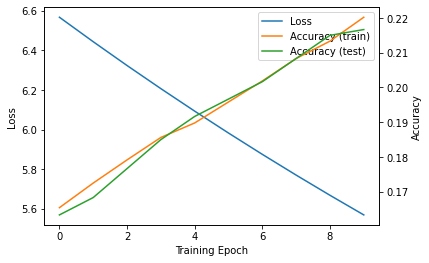

In [ ]:
#Adding more layers, and Different Activation function and new Weight initilization

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



Layers = [(75*75*3), 64, 16, 2]
model = FeedforwardNeuralNetwork(Layers, 0.001, 'none', 0, 0, 32, 0, ['uniform', -0.1,0.1], 'ReLU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))


### Architecture 3




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 1, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
[INFO] epoch = 2, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
[INFO] epoch = 3, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
[INFO] epoch = 4, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
[INFO] epoch = 5, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
[INFO] epoch = 6, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
[INFO] epoch = 7, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
[INFO] epoch = 8, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
[INFO] epoch = 9, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
[INFO] epoch = 10, loss = 0.000003, training accuracy = 0.971042, test accuracy = 0.976667
Training Time :  249.68659663200378 seconds
Training set accuracy
0.9710416666666667
Test set accur

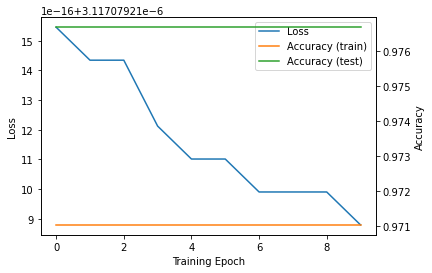

In [ ]:
#Accuracy dropped with new weight initilization , 
#using the previous initilization method with more deep network and new activation function

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3), 256, 128, 64, 2]
model = FeedforwardNeuralNetwork(layers, 0.001, 'none', 0, 0, 32, 0, ['normal', 1000], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))

print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))



### Architecture 4




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 1, loss = 5.357566, training accuracy = 0.358542, test accuracy = 0.345000
[INFO] epoch = 2, loss = 3.330570, training accuracy = 0.474375, test accuracy = 0.445000
[INFO] epoch = 3, loss = 2.977810, training accuracy = 0.516042, test accuracy = 0.490000
[INFO] epoch = 4, loss = 2.870062, training accuracy = 0.532500, test accuracy = 0.508333
[INFO] epoch = 5, loss = 2.815109, training accuracy = 0.537500, test accuracy = 0.518333
[INFO] epoch = 6, loss = 2.786761, training accuracy = 0.538750, test accuracy = 0.523333
[INFO] epoch = 7, loss = 2.720129, training accuracy = 0.536042, test accuracy = 0.515000
[INFO] epoch = 8, loss = 2.700646, training accuracy = 0.536875, test accuracy = 0.518333
[INFO] epoch = 9, loss = 2.648679, training accuracy = 0.536250, test accuracy = 0.518333
[INFO] epoch = 10, loss = 2.640547, training accuracy = 0.536042, test accuracy = 0.521667
Training Time :  461.58129811286926 seconds
Training set accuracy
0.5360416666666666
Test set accur

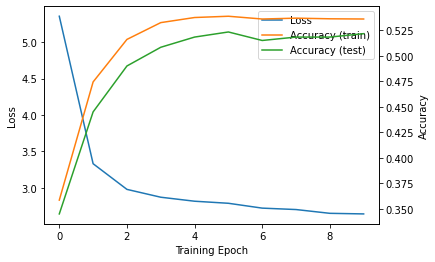

In [ ]:

#As, Accuracy improved, trying the same architecture again with new weight initilization
import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3), 512, 256, 128, 64, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0, 0, 32, 0, ['uniform', -0.1,0.1], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))



### Architecture  4  -  2



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 1, loss = 7.940548, training accuracy = 0.472917, test accuracy = 0.501667
[INFO] epoch = 2, loss = 4.736668, training accuracy = 0.460833, test accuracy = 0.480000
[INFO] epoch = 3, loss = 3.805881, training accuracy = 0.451250, test accuracy = 0.470000
[INFO] epoch = 4, loss = 3.454823, training accuracy = 0.451875, test accuracy = 0.471667
[INFO] epoch = 5, loss = 3.277351, training accuracy = 0.455625, test accuracy = 0.475000
[INFO] epoch = 6, loss = 3.160684, training accuracy = 0.458958, test accuracy = 0.476667
[INFO] epoch = 7, loss = 3.089686, training accuracy = 0.460833, test accuracy = 0.471667
[INFO] epoch = 8, loss = 3.043315, training accuracy = 0.461250, test accuracy = 0.471667
[INFO] epoch = 9, loss = 2.987777, training accuracy = 0.465208, test accuracy = 0.476667
[INFO] epoch = 10, loss = 2.947913, training accuracy = 0.468333, test accuracy = 0.478333
[INFO] epoch = 11, loss = 2.904272, training accuracy = 0.474792, test accuracy = 0.478333
[INFO] e

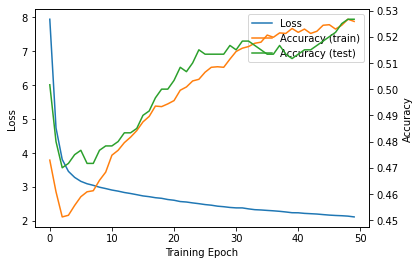

In [ ]:
#IT seems like accuracy was increasing so running the same architecture for more epochs
import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3), 512, 256, 128, 64, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0, 0, 32, 0, ['uniform', -0.1,0.1], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 50 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))



### Architecture 5


[INFO] epoch = 1, loss = 0.001631, training accuracy = 0.642708, test accuracy = 0.663333
[INFO] epoch = 2, loss = 0.001380, training accuracy = 0.619375, test accuracy = 0.641667
[INFO] epoch = 3, loss = 0.001211, training accuracy = 0.637292, test accuracy = 0.660000
[INFO] epoch = 4, loss = 0.001085, training accuracy = 0.622292, test accuracy = 0.646667
[INFO] epoch = 5, loss = 0.000992, training accuracy = 0.624167, test accuracy = 0.646667
[INFO] epoch = 6, loss = 0.000920, training accuracy = 0.631667, test accuracy = 0.656667
[INFO] epoch = 7, loss = 0.000862, training accuracy = 0.610000, test accuracy = 0.641667
[INFO] epoch = 8, loss = 0.000812, training accuracy = 0.636042, test accuracy = 0.670000
[INFO] epoch = 9, loss = 0.000770, training accuracy = 0.632708, test accuracy = 0.660000
[INFO] epoch = 10, loss = 0.000735, training accuracy = 0.618958, test accuracy = 0.650000
Training Time :  465.17977833747864 seconds
Training set accuracy
0.6189583333333334
Test set accur

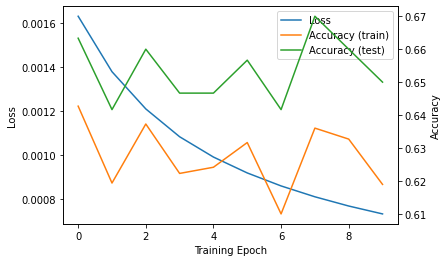

In [ ]:
#Not Much Differnece in the running more epochs
#Changing Weight Iniltilization method and Loss
import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3), 512, 256, 128, 64, 2]
model = FeedforwardNeuralNetwork(layers, 0.1, 'none', 0, 0, 32, 0, ['Glorot', 'uniform'], 'ELU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))



print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))



###Architecture 6

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 1, loss = 3715.097993, training accuracy = 0.367917, test accuracy = 0.366667
[INFO] epoch = 2, loss = 2718.516268, training accuracy = 0.216250, test accuracy = 0.233333
[INFO] epoch = 3, loss = 4032.699724, training accuracy = 0.147500, test accuracy = 0.138333
[INFO] epoch = 4, loss = 2114.200319, training accuracy = 0.306875, test accuracy = 0.305000
[INFO] epoch = 5, loss = 1788.795869, training accuracy = 0.467917, test accuracy = 0.458333
[INFO] epoch = 6, loss = 1443.446238, training accuracy = 0.312708, test accuracy = 0.296667
[INFO] epoch = 7, loss = 1851.270678, training accuracy = 0.293333, test accuracy = 0.276667
[INFO] epoch = 8, loss = 816.412307, training accuracy = 0.189375, test accuracy = 0.183333
[INFO] epoch = 9, loss = 781.031084, training accuracy = 0.317708, test accuracy = 0.315000
[INFO] epoch = 10, loss = 2575.607094, training accuracy = 0.401458, test accuracy = 0.413333
Trainig Time :  256.23807072639465 seconds
Training set accuracy
0.3475

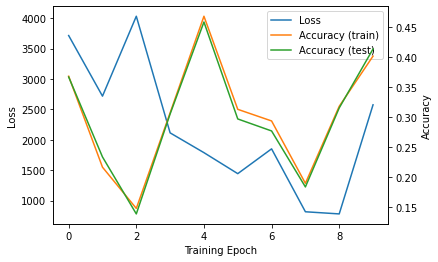

In [ ]:
#Lambda 2 Regularization 
import time
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os
from keras.models import load_model
from sklearn.externals import  joblib
import pickle


layers = [(75*75*3),  256, 128, 64, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0, 0.001, 32, 0, ['Glorot', 'uniform'], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()



#with open("/content/drive/My Drive/Project1/model_ct_scan" , "wb") as f:
    #pickle.dump(model,f)
joblib.dump(model,"/content/drive/My Drive/Project1/model_ct_scan")

print('Trainig Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))



print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))



### Architecture 7

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 1, loss = 3.227393, training accuracy = 0.508542, test accuracy = 0.525000
[INFO] epoch = 2, loss = 3.006092, training accuracy = 0.501667, test accuracy = 0.511667
[INFO] epoch = 3, loss = 2.812349, training accuracy = 0.497500, test accuracy = 0.496667
[INFO] epoch = 4, loss = 2.527361, training accuracy = 0.505417, test accuracy = 0.493333
[INFO] epoch = 5, loss = 2.593114, training accuracy = 0.517708, test accuracy = 0.498333
[INFO] epoch = 6, loss = 2.512535, training accuracy = 0.514792, test accuracy = 0.490000
[INFO] epoch = 7, loss = 2.578247, training accuracy = 0.503333, test accuracy = 0.485000
[INFO] epoch = 8, loss = 2.461464, training accuracy = 0.509792, test accuracy = 0.485000
[INFO] epoch = 9, loss = 2.408181, training accuracy = 0.501875, test accuracy = 0.480000
[INFO] epoch = 10, loss = 2.390907, training accuracy = 0.508333, test accuracy = 0.493333
Trainig Time :  251.48622393608093 seconds
Training set accuracy
0.5083333333333333
Test set accura

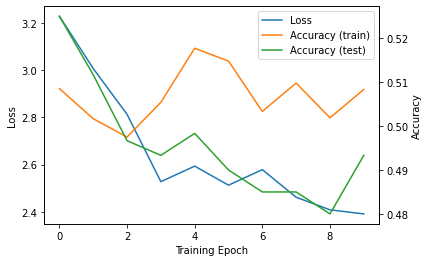

In [ ]:
#Lambda 1 and Lambda 2 Regularization

import time
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os
from keras.models import load_model
from sklearn.externals import  joblib
import pickle


layers = [(75*75*3),  256, 128, 64, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.001, 0.001, 32, 0, ['Glorot', 'uniform'], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()



#with open("/content/drive/My Drive/Project1/model_ct_scan" , "wb") as f:
    #pickle.dump(model,f)
joblib.dump(model,"/content/drive/My Drive/Project1/model_ct_scan")

print('Trainig Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))



print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))


###Architecture 8

[INFO] epoch = 1, loss = 0.001964, training accuracy = 0.992083, test accuracy = 0.991667
[INFO] epoch = 2, loss = 0.000859, training accuracy = 0.994583, test accuracy = 0.991667
[INFO] epoch = 3, loss = 0.000539, training accuracy = 0.995208, test accuracy = 0.991667
[INFO] epoch = 4, loss = 0.000389, training accuracy = 0.996250, test accuracy = 0.991667
[INFO] epoch = 5, loss = 0.000302, training accuracy = 0.996875, test accuracy = 0.993333
[INFO] epoch = 6, loss = 0.000246, training accuracy = 0.996875, test accuracy = 0.995000
[INFO] epoch = 7, loss = 0.000206, training accuracy = 0.997292, test accuracy = 0.995000
[INFO] epoch = 8, loss = 0.000177, training accuracy = 0.997500, test accuracy = 0.996667
[INFO] epoch = 9, loss = 0.000155, training accuracy = 0.997500, test accuracy = 0.996667
[INFO] epoch = 10, loss = 0.000137, training accuracy = 0.997917, test accuracy = 0.996667
Training set accuracy
0.9979166666666667
Test set accuracy
0.9966666666666667
Val set accuracy
0.99

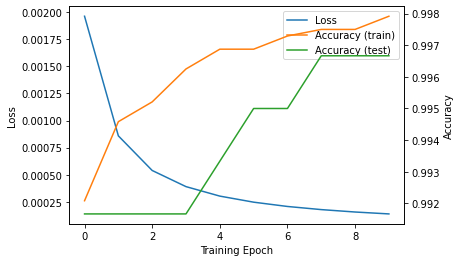

In [ ]:
#New Loss function, to see the change in loss plot

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os

from sklearn.externals import  joblib


layers = [(75*75*3), 512, 256, 128, 64, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0, 0, 32, 0, ['Glorot', 'uniform'], 'ReLU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()



print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))



print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))


### Pre-Final Architecture 9



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in multiply


[INFO] epoch = 1, loss = 0.538291, training accuracy = 0.942500, test accuracy = 0.936667
[INFO] epoch = 2, loss = 0.389623, training accuracy = 0.953958, test accuracy = 0.950000
[INFO] epoch = 3, loss = 0.309388, training accuracy = 0.961667, test accuracy = 0.958333
[INFO] epoch = 4, loss = 0.257402, training accuracy = 0.966667, test accuracy = 0.965000
[INFO] epoch = 5, loss = 0.220378, training accuracy = 0.971458, test accuracy = 0.970000
[INFO] epoch = 6, loss = 0.194405, training accuracy = 0.975833, test accuracy = 0.971667
[INFO] epoch = 7, loss = 0.174915, training accuracy = 0.979167, test accuracy = 0.973333
[INFO] epoch = 8, loss = 0.158886, training accuracy = 0.981042, test accuracy = 0.975000
[INFO] epoch = 9, loss = 0.145418, training accuracy = 0.983125, test accuracy = 0.976667
[INFO] epoch = 10, loss = 0.134216, training accuracy = 0.984583, test accuracy = 0.978333
Training Time :  456.3337562084198 seconds
Training set accuracy
0.9845833333333334
Test set accura

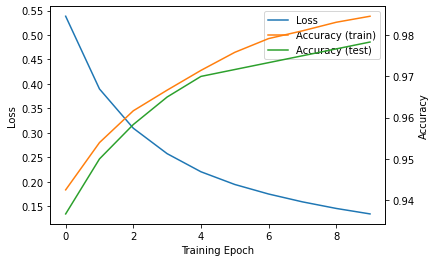

In [ ]:
# Using the Higest Accuracy Architecture from above with Loss - Cross Entropy

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_errors
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os

from sklearn.externals import  joblib


layers = [(75*75*3), 512, 256, 128, 64, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0, 0, 32, 0, ['Glorot', 'uniform'], 'ReLU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')
joblib.dump(model,"/content/drive/My Drive/Project1/model_ct_scan_1")

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))



print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))



### Final Architecture 

[INFO] epoch = 1, loss = 0.187680, training accuracy = 0.870833, test accuracy = 0.871667
[INFO] epoch = 2, loss = 0.186499, training accuracy = 0.933333, test accuracy = 0.940000
[INFO] epoch = 3, loss = 0.186107, training accuracy = 0.955833, test accuracy = 0.955000
[INFO] epoch = 4, loss = 0.185895, training accuracy = 0.968542, test accuracy = 0.963333
[INFO] epoch = 5, loss = 0.185747, training accuracy = 0.973750, test accuracy = 0.971667
[INFO] epoch = 6, loss = 0.185629, training accuracy = 0.978333, test accuracy = 0.976667
[INFO] epoch = 7, loss = 0.185528, training accuracy = 0.981458, test accuracy = 0.976667
[INFO] epoch = 8, loss = 0.185437, training accuracy = 0.983542, test accuracy = 0.976667
[INFO] epoch = 9, loss = 0.185353, training accuracy = 0.986042, test accuracy = 0.976667
[INFO] epoch = 10, loss = 0.185274, training accuracy = 0.987500, test accuracy = 0.978333
Training set accuracy
0.9875
Test set accuracy
0.9783333333333334
Val set accuracy
0.98333333333333

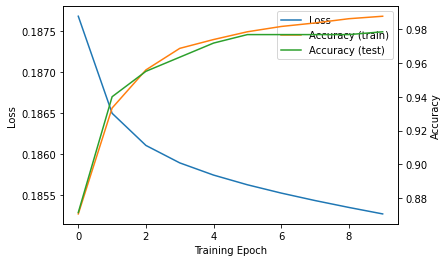

In [ ]:
#Highest Accuracy Architecture with Loss - Sums of Squre, L1 Regularization , 4 hidden Layers

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os

from sklearn.externals import  joblib


layers = [(75*75*3), 512, 256, 128, 64, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.01, 0, 32, 0, ['Glorot', 'uniform'], 'ReLU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()


#Saving the model , so that it can be used anywhere

joblib.dump(model,"/content/drive/My Drive/Project1/model_ct_scan_2")
print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))



print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))


# **Classifier 2 : Chest X - Ray**
---


## Data Download

In [ ]:
#Changing the pwd to specific directory to avoid the copying step
%cd /content/drive/My\ Drive/Project1/X-Ray/Kaggle

/content/drive/My Drive/Project1/X-Ray/Kaggle


In [ ]:
#Download the dataset from DropBox
!wget http://cb.lk/covid_19

--2020-10-10 21:00:03--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-10-10 21:00:04--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-10-10 21:00:05--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-10-10 21:00:05--  https://www.dropbox.com/s/raw/7rjw

In [ ]:
!ls


covid_19  kaggle.json


In [ ]:
!cp -r covid_19 ../

In [ ]:
%cd ../

/content/drive/My Drive/Project1/X-Ray


In [ ]:
#Extracting the dataset
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
import os
#Checking the number of images for training
for item in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Train"):
    k = 0
    for i in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Train/" + str(item) + "/"):
        k = k + 1 
    print(item , i, k)

Covid radiol.2020200490.fig3.jpeg 112
Normal IM-0635-0001.jpeg 112


In [ ]:
import os
#Checking the number of images for testing
for item in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/test"):
    k = 0
    for i in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/test/" + str(item) + "/"):
        k = k + 1 
    print(item , i, k)

Covid covid-19-pneumonia-14-PA.png 30
Normal NORMAL2-IM-1060-0001.jpeg 30


## Data Augmentation

---

In [ ]:
#As data is low, we will perfrom augmentaion for Training Data
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = image.ImageDataGenerator(

    #Parameters for Data Augmentation
    #Rescalingn the images
    rescale = 1./255,
    #Flipping the image
    horizontal_flip = True,
    #Slanting the image
    shear_range = 0.2,
    #Zooming 
    zoom_range = 0.2,
    
)


for item in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Train/"):
    k = 0
    for g in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Train/" + str(item) + "/"):
        # PIL image
        img = load_img("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Train/" + str(item) + "/" + str(g))  
        print("Reading : /content/drive/My Drive/Project1/X-Ray/CovidDataset/Train/" + str(item) + "/" + str(g))
        x = img_to_array(img)  
        # Numpy array 
        x = x.reshape((1,) + x.shape)  # Numpy array 

# .flow()  generates batches of randomly transformed images

        i = 0
        k = k + 1
        saves the results to the `preview/` directory
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir="/content/drive/My Drive/Project1/X-Ray/Dataset/Train/" + str(item) + "/" , save_prefix="img" + str(k), save_format='jpeg'):
            i += 1

            print("Writing : " + "/content/drive/My Drive/Project1/X-Ray/Dataset/Train/" + str(item) + "/" + "img" + str(k) +".jpeg")

            #convert one image into 40 images with different augmentation parameters
            k = k + 1
            if i > 40:
             break  

Streaming output truncated to the last 5000 lines.
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4409.jpeg
Reading : /content/drive/My Drive/Project1/X-Ray/CovidDataset/Train/2/ryct.2020200028.fig1a.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4411.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4412.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4413.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4414.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4415.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4416.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4417.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4418.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4419.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img4420

In [ ]:
!rm -rf /content/drive/My\ Drive/Project1/X-Ray/Dataset/Train/2/*

In [ ]:
#Same as Training Data Augmentation , Performing Data Augmentation for test data
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = image.ImageDataGenerator(

    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    
)


for item in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/"):
    k = 0
    for g in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/" + str(item) + "/"):

        img = load_img("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/" + str(item) + "/" + str(g))  
        print("Reading : /content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/" + str(item) + "/" + str(g))
        x = img_to_array(img) 
        x = x.reshape((1,) + x.shape)  


        i = 0
        k = k + 1
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir="/content/drive/My Drive/Project1/X-Ray/Dataset/Test/" + str(item) + "/" , save_prefix="img" + str(k), save_format='jpeg'):
            i += 1

            print("Writing : " + "/content/drive/My Drive/Project1/X-Ray/Dataset/Test/" + str(item) + "/" + "img" + str(k) +".jpeg")

            k = k + 1
            if i > 20:
             break  

Reading : /content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/2/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img1.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img2.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img3.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img4.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img5.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img6.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img7.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img8.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img9.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img10.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img11.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Test/2/img12.j

In [ ]:
#Same as Training And Testing Data Augmentation , Performing Data Augmentation for Val data
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = image.ImageDataGenerator(

    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    
)


for item in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/"):
    k = 0
    for g in os.listdir("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/" + str(item) + "/"):

        img = load_img("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/" + str(item) + "/" + str(g))  
        print("Reading : /content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/" + str(item) + "/" + str(g))
        x = img_to_array(img)  
        x = x.reshape((1,) + x.shape)  



        i = 0
        k = k + 1
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir="/content/drive/My Drive/Project1/X-Ray/Dataset/Val/" + str(item) + "/" , save_prefix="img" + str(k), save_format='jpeg'):
            i += 1

            print("Writing : " + "/content/drive/My Drive/Project1/X-Ray/Dataset/Val/" + str(item) + "/" + "img" + str(k) +".jpeg")

            k = k + 1
            if i > 20:
             break  

Reading : /content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/2/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img1.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img2.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img3.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img4.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img5.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img6.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img7.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img8.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img9.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img10.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img11.jpeg
Writing : /content/drive/My Drive/Project1/X-Ray/Dataset/Val/2/img12.jpeg
Writing 

##Data Visualiztion 

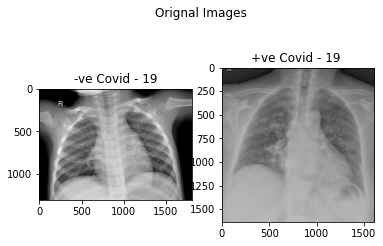

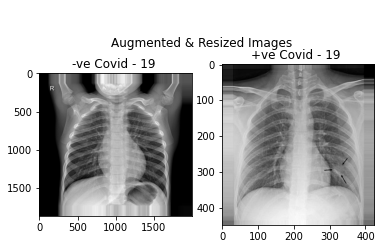

In [ ]:
#Visualizing the orignal and augmented Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 
nimg = Image.open("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Test/1/NORMAL2-IM-1022-0001.jpeg")
pimg = Image.open("/content/drive/My Drive/Project1/X-Ray/CovidDataset/Train/2/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg")




fig = plt.figure()
fig.suptitle("Orignal Images\n\n")
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(nimg, cmap='gray')
ax.set_title('-ve Covid - 19')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('+ve Covid - 19 ')
imgplot = plt.imshow(pimg, cmap='gray')






fig1 = plt.figure()

fig1.suptitle("\n\nAugmented & Resized Images\n\n\n")
ax = fig1.add_subplot(1, 2, 1 )
nr  = Image.open("/content/drive/My Drive/Project1/X-Ray/Dataset/Train/1/img1009_0_2645.jpeg")
imgplot = plt.imshow(nr, cmap='gray')

ax.set_title('-ve Covid - 19 ')


ax = fig1.add_subplot(1, 2, 2 )
ax.set_title('+ve Covid - 19 ')
pr  = Image.open("/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img1009_0_4849.jpeg")
imgplot = plt.imshow(pr, cmap='gray')



##Dataset Preparation

---


The comments for this section are same as the comments in other classifier, creating the dataset, writing it to CSV and Reading it from CSV for train,test,val data.
CSV is usedful as it makes processed dataset portable and avoid the the step to create the dataset again if colab crashes.

### Training Data

In [ ]:
import os
import cv2
import numpy as np

def get_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            print(os.path.join(img_folder, dir1))
            image_path= os.path.join(img_folder, dir1,  file)
            print(image_path)
            image= cv2.imread( image_path) 
            print(image.shape)
            
            image=cv2.resize(image, (75, 75) ,interpolation = cv2.INTER_AREA)
            
             
            img_data_array.append(image)
            class_name.append(dir1)
    return np.array(img_data_array), np.array(class_name).reshape(len(class_name),1)

In [ ]:
tX , tY = get_dataset("/content/drive/My Drive/Project1/X-Ray/Dataset/Train/")

Streaming output truncated to the last 5000 lines.
(1165, 1165, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img2983_0_3697.jpeg
(1165, 1165, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img2983_0_8315.jpeg
(1165, 1165, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img2983_0_4321.jpeg
(1165, 1165, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img2983_0_3601.jpeg
(1165, 1165, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img2983_0_9111.jpeg
(1165, 1165, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2/img2983_0_6295.jpeg
(1165, 1165, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Train/2
/c

In [ ]:
print('Number of data points :', tX.shape[0])
print('Shape of feature set X :', tX.shape)
tX = tX.reshape(tX.shape[0],75*75*3)
print('Shape of feature set X after reshape :', tX.shape)

Number of data points : 9910
Shape of feature set X : (9910, 75, 75, 3)
Shape of feature set X after reshape : (9910, 16875)


In [ ]:
print('Shape of label set Y :', tY.shape)

Shape of label set Y : (9910, 1)


In [ ]:
import csv

with open("/content/drive/My Drive/Project1/X-Ray/Dataset/tchestdata.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(tX)


with open("/content/drive/My Drive/Project1/X-Ray/Dataset/tchestlabels.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(tY)

print("CSV Written")

CSV Written


In [ ]:
from google.colab import files
files.download('/content/drive/My Drive/Project1/X-Ray/Dataset/tchestdata.csv')
files.download("/content/drive/My Drive/Project1/X-Ray/Dataset/tchestlabels.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Test Data

In [ ]:
import os
import cv2
import numpy as np

def get_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            print(os.path.join(img_folder, dir1))
            image_path= os.path.join(img_folder, dir1,  file)
            print(image_path)
            image= cv2.imread( image_path) #, cv2.COLOR_BGR2RGB)
            print(image.shape)
            #print(image.mode)
            image=cv2.resize(image, (75, 75) ,interpolation = cv2.INTER_AREA)
            #image=np.array(image)
            #image = image.astype('float32')
            #image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return np.array(img_data_array), np.array(class_name).reshape(len(class_name),1)

In [ ]:
ttX , ttY = get_dataset("/content/drive/My Drive/Project1/X-Ray/Dataset/Test/")

Streaming output truncated to the last 5000 lines.
(1314, 1804, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1/img265_0_5332.jpeg
(1314, 1804, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1/img265_0_1967.jpeg
(1314, 1804, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1/img265_0_2728.jpeg
(1314, 1804, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1/img277_0_9577.jpeg
(1240, 1684, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1/img277_0_7128.jpeg
(1240, 1684, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1/img277_0_5780.jpeg
(1240, 1684, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Test/1
/content/drive/My Dri

In [ ]:
print('Number of data points :', ttX.shape[0])
print('Shape of feature set X :', ttX.shape)
ttX = ttX.reshape(ttX.shape[0],75*75*3)
print('Shape of feature set X after reshape :', ttX.shape)

Number of data points : 1916
Shape of feature set X : (1916, 75, 75, 3)
Shape of feature set X after reshape : (1916, 16875)


In [ ]:
print('Shape of label set Y :', ttY.shape)

Shape of label set Y : (1916, 1)


In [ ]:
import csv

with open("/content/drive/My Drive/Project1/X-Ray/Dataset/testchestdata.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(ttX)


with open("/content/drive/My Drive/Project1/X-Ray/Dataset/testchestlabels.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(ttY)

print("CSV Written")

CSV Written


In [ ]:
from google.colab import files
files.download('/content/drive/My Drive/Project1/X-Ray/Dataset/testchestdata.csv')
files.download("/content/drive/My Drive/Project1/X-Ray/Dataset/testchestlabels.csv")

print("Download Complete")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download Complete


### Val Data

---


In [ ]:
import os
import cv2
import numpy as np

def get_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            print(os.path.join(img_folder, dir1))
            image_path= os.path.join(img_folder, dir1,  file)
            print(image_path)
            image= cv2.imread( image_path) #, cv2.COLOR_BGR2RGB)
            print(image.shape)
            #print(image.mode)
            image=cv2.resize(image, (75, 75) ,interpolation = cv2.INTER_AREA)
            #image=np.array(image)
            #image = image.astype('float32')
            #image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return np.array(img_data_array), np.array(class_name).reshape(len(class_name),1)

In [ ]:
vX , vY = get_dataset("/content/drive/My Drive/Project1/X-Ray/Dataset/Val/")

Streaming output truncated to the last 5000 lines.
(1314, 1804, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1/img277_0_3430.jpeg
(1240, 1684, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1/img277_0_2254.jpeg
(1240, 1684, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1/img277_0_5322.jpeg
(1240, 1684, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1/img277_0_7054.jpeg
(1240, 1684, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1/img277_0_7641.jpeg
(1240, 1684, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1/img277_0_628.jpeg
(1240, 1684, 3)
/content/drive/My Drive/Project1/X-Ray/Dataset/Val/1
/content/drive/My Drive/Project1/X-

In [ ]:
print('Number of data points :', vX.shape[0])
print('Shape of feature set X :', vX.shape)
vX = vX.reshape(vX.shape[0],75*75*3)
print('Shape of feature set X after reshape :', vX.shape)

Number of data points : 1919
Shape of feature set X : (1919, 75, 75, 3)
Shape of feature set X after reshape : (1919, 16875)


In [ ]:
print('Shape of label set Y :', vY.shape)

Shape of label set Y : (1919, 1)


In [ ]:
import csv

with open("/content/drive/My Drive/Project1/X-Ray/Dataset/valchestdata.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(vX)


with open("/content/drive/My Drive/Project1/X-Ray/Dataset/valchestlabels.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(vY)

print("CSV Written")

CSV Written


In [ ]:
from google.colab import files
files.download('/content/drive/My Drive/Project1/X-Ray/Dataset/valchestdata.csv')
files.download("/content/drive/My Drive/Project1/X-Ray/Dataset/valchestlabels.csv")

print("Download Complete")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download Complete


## Artificial Neural Network

---


The Comments for this class is exactly same as the comments of the Artificial Neural Network of the other classifier

In [ ]:

class FeedforwardNeuralNetwork:
    
    def __init__(self, layers, alpha = 0.1, annealing = 'none', lambda1 = 0, lambda2 = 0, batchSize = 32, gamma = 0.0,
                 initialization = 'normal', activations = 'sigmoid', loss = 'sum-of-squares'):
        
        self.W = []                    
        self.layers = layers           
        self.alpha = alpha             
        self.annealing = annealing      
        self.lambda1 = lambda1          
        self.lambda2 = lambda2          
        self.batchSize = batchSize      
        self.gamma = gamma             
        self.activation = activations   
        self.loss = loss                

       
        if initialization[0] == 'normal':
            for i in np.arange(0, len(layers) - 2):
                self.W.append(np.random.normal(0.0, 1.0, size=(layers[i] + 1, layers[i + 1] + 1))/initialization[1])

           
            self.W.append(np.random.normal(0.0, 1.0, size=(layers[-2] + 1, layers[-1]))/initialization[1])
            
        if initialization[0] == 'uniform':

            for i in np.arange(0, len(layers) - 2):
                self.W.append(np.random.uniform(initialization[1], initialization[2], size=(layers[i] + 1, layers[i + 1] + 1)))

           
            self.W.append(np.random.uniform(initialization[1], initialization[2], size=(layers[-2] + 1, layers[-1])))
            
        if initialization == 'Nielsen':

            for i in np.arange(0, len(layers) - 2):
                self.W.append(np.random.normal(0.0, 1.0, size=(layers[i] + 1, layers[i + 1] + 1))/layers[i+1])

           
            self.W.append(np.random.normal(0.0, 1.0, size=(layers[-2] + 1, layers[-1]))/layers[-1])
            
        
        if initialization[0] in ['LeCun', 'Glorot', 'He']:
            
            for i in np.arange(0, len(layers) - 2):
                
                
                
               
                if initialization[0] == 'LeCun':
                    limit = np.sqrt(1.0 / layers[i+1])
                    
                
                elif initialization[0] == 'Glorot':
                    mean = (layers[i] + layers[i+1])/2.0
                    limit = np.sqrt(1.0 / mean)
                    
                
                elif initialization[0] == 'He':
                    limit = np.sqrt(2.0 / layers[i+1])
                
               
                if initialization[1] == 'normal':
                    self.W.append(np.random.normal(0.0, limit, size=(layers[i] + 1, layers[i + 1] + 1)))
                    
                elif initialization[1] == 'uniform':
                    limit *= np.sqrt(3.0)
                    self.W.append(np.random.uniform(-limit, limit, size=(layers[i] + 1, layers[i + 1] + 1)))

           
            if initialization[0] == 'LeCun':
                limit = np.sqrt(1.0 / layers[-2])
                
            elif initialization[0] == 'Glorot':
                mean = (layers[-2] + layers[-1])/2.0
                limit = np.sqrt(1.0 / mean)
                    
            elif initialization[0] == 'He':
                limit = np.sqrt(2.0 / layers[-2])
          
            if initialization[1] == 'normal':
                self.W.append(np.random.normal(0.0, limit, size=(layers[-2] + 1, layers[-1])))
                
            elif initialization[1] == 'uniform':
                limit *= np.sqrt(3.0)
                self.W.append(np.random.uniform(-limit, limit, size=(layers[-2] + 1, layers[-1])))
        
   
    def activate(self, x):
     
        if self.activation == 'sigmoid':
            return 1.0 / (1 + np.exp(-x))

       
        if self.activation == 'ReLU':
            return x*(x >= 0)
        
  
        if self.activation == 'ELU':
            return x*(x >= 0) + 0.1*(np.exp(x) - 1)*(x < 0)
    
   
    def activationDerivative(self, x):
       
        if self.activation == 'sigmoid':
            return self.activate(x) * (1 - self.activate(x))
       
        if self.activation == 'ReLU':
            return x >= 0
       
        if self.activation == 'ELU':
            return 1*(x >= 0) + 0.1*np.exp(x)*(x < 0)
    
    def getNextBatch(self, X, y, batchSize):
        for i in np.arange(0, X.shape[0], batchSize):
            yield (X[i:i + batchSize], y[i:i + batchSize])
  
    def fit(self, X, y, testX, testY, epochs = 10000, update = 1000, printPerformance = True):
        trainX = X
       
        X = np.hstack((X, np.ones([X.shape[0],1])))
        losses = []
        trainAccuracies = []
        testAccuracies = []
        trainY = y
        
        numberOfExamples = X.shape[0]
        
        
        y = LabelBinarizer().fit_transform(y)
        
        v = []
        for layer in np.arange(0,len(self.W)):
            v.append(np.zeros(self.W[layer].shape))
            
        alpha = self.alpha

        for epoch in np.arange(0,epochs):
            
            if self.annealing[0] == 'step':
                stepSize = self.alpha/self.annealing[1]
                if epochs > 0 and epoch % self.annealing[1] == 0:
                    alpha -= stepSize
                    print(alpha)
                
            elif self.annealing[0] == 'exp':
                alpha = self.alpha * np.exp(-self.annealing[1] * epoch)
                    
            elif self.annealing[0] == 'inv':
                alpha = self.alpha / (1 + self.annealing[1] * epoch)
            
         
            p = np.arange(0,X.shape[0])
            np.random.shuffle(p)
            X = X[p]
            y = y[p]

            
            for (x, target) in self.getNextBatch(X, y, self.batchSize):
                
                A = [np.atleast_2d(x)]
                Z = [np.atleast_2d(x)]
                
           
                for layer in np.arange(0, len(self.W)):
                    
                   
                    net = A[layer].dot(self.W[layer])
                    out = self.activate(net)
                    
                    
                    A.append(out)
                    Z.append(net)
                    
               
                error = A[-1] - target
                
                if self.loss == 'sum-of-squares':
                    D = [error * self.activationDerivative(Z[-1])]
                    
                if self.loss == 'cross-entropy':
                    D = [error]
                
                
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.activationDerivative(Z[layer])
                    D.append(delta)
                    
            
                D = D[::-1]
                
            
                for layer in np.arange(0, len(self.W)):
                    gradient = (A[layer].T.dot(D[layer])
                                + (self.lambda1 / numberOfExamples) * np.sign(self.W[layer])
                                + (self.lambda2 / numberOfExamples) * self.W[layer])
                    
                    v[layer] = self.gamma * v[layer] + alpha * gradient
                    self.W[layer] -= v[layer]
              
     
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)

               
                if printPerformance:
                    predictedY = self.predict(testX)
                    predictedY = predictedY.argmax(axis=1)
                    testAccuracy = accuracy_score(testY, predictedY)           

                    predictedY = self.predict(trainX)
                    predictedY = predictedY.argmax(axis=1)
                    trainAccuracy = accuracy_score(trainY, predictedY)

                    testAccuracies.append(testAccuracy)
                    trainAccuracies.append(trainAccuracy)
                    losses.append(loss)
                    print("[INFO] epoch = {}, loss = {:.6f}, training accuracy = {:.6f}, test accuracy = {:.6f}".format(epoch + 1, loss, trainAccuracy, testAccuracy))
                    
               
                else:
                    losses.append(loss)
                    print("[INFO] epoch = {}, loss = {:.6f}".format(epoch + 1, loss))

       
        if printPerformance:
            fig, ax1 = plt.subplots()

      
            p1 = ax1.plot(np.arange(0, epochs, update), losses, label = 'Loss')
            ax1.set_xlabel('Training Epoch')
            ax1.set_ylabel('Loss')

            
            ax2 = ax1.twinx()
            
            
            p2 = ax2.plot(np.arange(0, epochs, update), trainAccuracies, label = 'Accuracy (train)', color = 'tab:orange')
            p3 = ax2.plot(np.arange(0, epochs, update), testAccuracies, label = 'Accuracy (test)', color = 'tab:green')
            ax2.set_ylabel('Accuracy')

            
            ps = p1 + p2 + p3
            labs = [p.get_label() for p in ps]
            ax1.legend(ps, labs, loc=0)
            
    
    def predict(self, X, addOnes = True):
        
        p = np.atleast_2d(X)
        
        
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
     
        for layer in np.arange(0, len(self.W)):
            p = self.activate(np.dot(p, self.W[layer]))
            
        return p
    
   
    def computeLoss(self, X, y):
       
        y = np.atleast_2d(y)
        
        
        predictions = self.predict(X, addOnes = False)
        
        
        if self.loss == 'sum-of-squares':
            loss = np.sum((predictions - y)**2) / 2.0
            
       
        if self.loss == 'cross-entropy':
            loss = np.sum(np.nan_to_num(-y*np.log(predictions)-(1-y)*np.log(1-predictions)))
            
       
        if self.lambda1 != 0:
           
            L1penalty = 0

            for layer in np.arange(0,len(self.W)):
                L1penalty += np.sum(np.abs(self.W[layer]))
        
            
            loss = loss + (self.lambda1 / X.shape[0]) * L1penalty
            
       
        if self.lambda2 != 0:
            
            L2penalty = 0

            for layer in np.arange(0,len(self.W)):
                L2penalty += np.sum(self.W[layer] ** 2)
        
            
            loss = loss + (self.lambda2 / X.shape[0]) * L2penalty
        
        return loss

## Data Reading

---


In [ ]:
import pandas as pd

#Reading the Data from CSV using pandas

testX =pd.read_csv("/content/drive/My Drive/Project1/X-Ray/Dataset/testchestdata.csv", sep=',',header=None)


testY = pd.read_csv("/content/drive/My Drive/Project1/X-Ray/Dataset/testchestlabels.csv", sep=',',header=None).to_numpy()



print('X :\n', testX.values)
print('Shape of testX :', testX.values.shape)
print('testY :\n', testY)
print('Shape of testY :', testY.shape)




trainX = pd.read_csv("/content/drive/My Drive/Project1/X-Ray/Dataset/tchestdata.csv", sep=',',header=None)


trainY = pd.read_csv("/content/drive/My Drive/Project1/X-Ray/Dataset/tchestlabels.csv", sep=',',header=None).to_numpy()



print('trainX :\n', trainX.values)
print('Shape of trainX :', trainX.values.shape)
print('trainY :\n', trainY)
print('Shape of trainY :', trainY.shape)




valX = pd.read_csv("/content/drive/My Drive/Project1/X-Ray/Dataset/valchestdata.csv", sep=',',header=None)

valY = pd.read_csv("/content/drive/My Drive/Project1/X-Ray/Dataset/valchestlabels.csv", sep=',',header=None).to_numpy()



print('valX :\n', valX.values)
print('Shape of valX :', valX.values.shape)
print('valY :\n', valY)
print('Shape of valY :', valY.shape)




X :
 [[ 10  10  10 ...   0   0   0]
 [ 30  30  30 ...   0   0   0]
 [ 68  68  68 ...   3   3   3]
 ...
 [  1   1   1 ...   1   1   1]
 [  4   4   4 ...   1   1   1]
 [  1   1   1 ... 163 163 163]]
Shape of testX : (1916, 16875)
testY :
 [[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]
Shape of testY : (1916, 1)
trainX :
 [[  9   9   9 ...   0   0   0]
 [ 58  58  58 ...  42  42  42]
 [  0   0   0 ...   0   0   0]
 ...
 [152 152 152 ... 192 192 192]
 [ 25  25  25 ... 150 150 150]
 [  0   0   0 ...  84  84  84]]
Shape of trainX : (9910, 16875)
trainY :
 [[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]
Shape of trainY : (9910, 1)
valX :
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [ 67  67  67 ...   0   0   0]
 ...
 [ 58  58  58 ... 213 213 213]
 [167 167 167 ...   1   1   1]
 [  1   1   1 ...   1   1   1]]
Shape of valX : (1919, 16875)
valY :
 [[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]
Shape of valY : (1919, 1)


## Architecture , Tunning -  Hyperparameters, Regularization

###Architecture 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: RuntimeWarning: overflow encountered in exp


[INFO] epoch = 1, loss = 174.545068, training accuracy = 0.334914, test accuracy = 0.325157
[INFO] epoch = 2, loss = 110.572937, training accuracy = 0.332089, test accuracy = 0.320459
[INFO] epoch = 3, loss = 61.671444, training accuracy = 0.332190, test accuracy = 0.316284
[INFO] epoch = 4, loss = 49.899581, training accuracy = 0.341877, test accuracy = 0.325678
[INFO] epoch = 5, loss = 41.963845, training accuracy = 0.346317, test accuracy = 0.331942
[INFO] epoch = 6, loss = 35.237646, training accuracy = 0.367608, test accuracy = 0.358559
[INFO] epoch = 7, loss = 31.115826, training accuracy = 0.370131, test accuracy = 0.361169
[INFO] epoch = 8, loss = 26.978063, training accuracy = 0.372957, test accuracy = 0.363779
[INFO] epoch = 9, loss = 20.916555, training accuracy = 0.313824, test accuracy = 0.300104
[INFO] epoch = 10, loss = 19.093202, training accuracy = 0.322704, test accuracy = 0.310543
Training Time :  66.91467547416687 seconds
Training set accuracy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: RuntimeWarning: overflow encountered in exp


0.3227043390514632
Test set accuracy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: RuntimeWarning: overflow encountered in exp


0.3105427974947808
Val set accuracy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: RuntimeWarning: overflow encountered in exp


0.31005732152162585


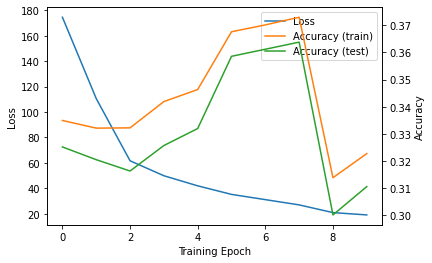

In [ ]:
#Trying the Simple Architecture , to decide future path

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3), 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.001, 'none', 0, 0, 32, 0, ['normal', 1], 'sigmoid', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))


###Architecture 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 1, loss = 0.241982, training accuracy = 0.549041, test accuracy = 0.580898
[INFO] epoch = 2, loss = 0.199760, training accuracy = 0.508981, test accuracy = 0.545407
[INFO] epoch = 3, loss = 0.172395, training accuracy = 0.487891, test accuracy = 0.518789
[INFO] epoch = 4, loss = 0.148435, training accuracy = 0.456206, test accuracy = 0.477035
[INFO] epoch = 5, loss = 0.134969, training accuracy = 0.445005, test accuracy = 0.463466
[INFO] epoch = 6, loss = 0.116812, training accuracy = 0.427245, test accuracy = 0.442589
[INFO] epoch = 7, loss = 0.109763, training accuracy = 0.424319, test accuracy = 0.435804
[INFO] epoch = 8, loss = 0.104652, training accuracy = 0.428860, test accuracy = 0.436848
[INFO] epoch = 9, loss = 0.100764, training accuracy = 0.436630, test accuracy = 0.450418
[INFO] epoch = 10, loss = 0.090680, training accuracy = 0.410696, test accuracy = 0.424843
Training Time :  286.4158720970154 seconds
Training set accuracy
0.4106962663975782
Test set accura

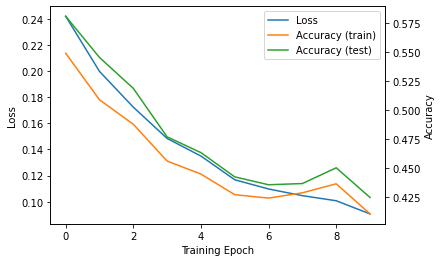

In [ ]:
#Low accuracy trying with new layer , activation function and learning rate
import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3), 128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0, 0, 32, 0, ['normal', 1000], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

###Architecture 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: invalid value encountered in multiply


[INFO] epoch = 1, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 2, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 3, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 4, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 5, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 6, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 7, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 8, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 9, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 10, loss = 0.000000, training accuracy = 1.000000, test accuracy = 1.000000
Training Time :  505.9905586242676 seconds
Training set accuracy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in less


1.0
Test set accuracy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in less


1.0
Val set accuracy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in less


1.0


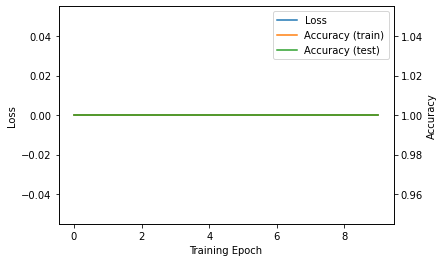

In [ ]:
#As, accuracy increased keeping all the parameters same, except adding one more layer and differnet weight initilization method
import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3), 256, 128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0, 0, 32, 0, ['Glorot', 'uniform'], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

### Architecture 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in multiply


[INFO] epoch = 1, loss = 64584671139923694190592.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 2, loss = 64584671139923694190592.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 3, loss = 64584671139923694190592.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 4, loss = 64584671139923694190592.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 5, loss = 64584671139923694190592.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 6, loss = 64584671139923694190592.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 7, loss = 64584671139923694190592.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 8, loss = 64584671139923694190592.000000, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 9, loss = 64584671139923694190592.000000, training accuracy = 1.000000, test accuracy = 1

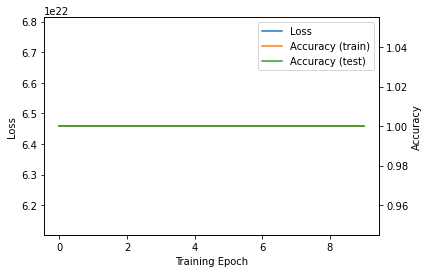

In [ ]:
#Clearly, over -fiiting so try another weight initilization  and L 1 Regularization

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



Layers = [(75*75*3), 256, 128, 16, 2]
model = FeedforwardNeuralNetwork(Layers, 0.01, 'none', 0.01, 0, 32, 0, ['Glorot', 'uniform'], 'ReLU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

### Architecture 5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 1, loss = 0.206256, training accuracy = 0.512714, test accuracy = 0.559499
[INFO] epoch = 2, loss = 0.191070, training accuracy = 0.518063, test accuracy = 0.553236
[INFO] epoch = 3, loss = 0.159545, training accuracy = 0.538749, test accuracy = 0.576200
[INFO] epoch = 4, loss = 0.146912, training accuracy = 0.557619, test accuracy = 0.603340
[INFO] epoch = 5, loss = 0.133264, training accuracy = 0.547023, test accuracy = 0.589770
[INFO] epoch = 6, loss = 0.125020, training accuracy = 0.562462, test accuracy = 0.615866
[INFO] epoch = 7, loss = 0.117345, training accuracy = 0.558729, test accuracy = 0.612213
[INFO] epoch = 8, loss = 0.110491, training accuracy = 0.546620, test accuracy = 0.598121
[INFO] epoch = 9, loss = 0.104871, training accuracy = 0.543391, test accuracy = 0.600731
[INFO] epoch = 10, loss = 0.100685, training accuracy = 0.537941, test accuracy = 0.598643
Training Time :  297.6112208366394 seconds
Training set accuracy
0.5379414732593341
Test set accura

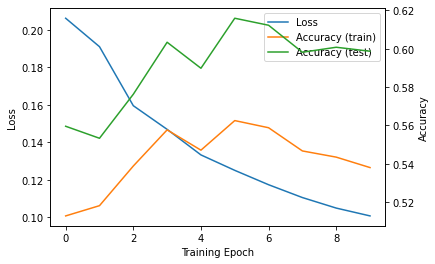

In [ ]:
#As,still it was overfitting reducing a hidden layer, applying L1 and L2 Regularization and new Activation function

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3),  128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.001, 0.001 , 32, 0, ['normal', 1000], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

### Architecture 5 - 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 1, loss = 0.206919, training accuracy = 0.344400, test accuracy = 0.382046
[INFO] epoch = 2, loss = 0.186959, training accuracy = 0.377598, test accuracy = 0.412317
[INFO] epoch = 3, loss = 0.159016, training accuracy = 0.412815, test accuracy = 0.438413
[INFO] epoch = 4, loss = 0.147761, training accuracy = 0.415136, test accuracy = 0.450939
[INFO] epoch = 5, loss = 0.141336, training accuracy = 0.428658, test accuracy = 0.474426
[INFO] epoch = 6, loss = 0.134206, training accuracy = 0.451968, test accuracy = 0.499478
[INFO] epoch = 7, loss = 0.134386, training accuracy = 0.439859, test accuracy = 0.490605
[INFO] epoch = 8, loss = 0.131346, training accuracy = 0.442987, test accuracy = 0.497912
[INFO] epoch = 9, loss = 0.113553, training accuracy = 0.433098, test accuracy = 0.489040
[INFO] epoch = 10, loss = 0.108920, training accuracy = 0.455499, test accuracy = 0.511482
[INFO] epoch = 11, loss = 0.099966, training accuracy = 0.451463, test accuracy = 0.503653
[INFO] e

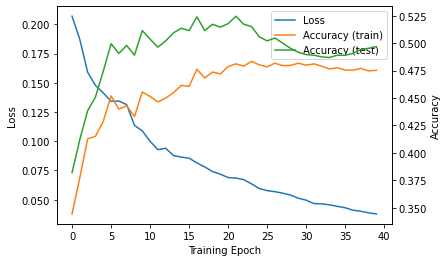

In [ ]:
#Accuracy is good , but it seems like if ran for more epochs accuracy can be improved

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3),  128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.001, 0.001 , 32, 0, ['normal', 1000], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 40 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

### Architecture 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:333: RuntimeWarning: invalid value encountered in log


[INFO] epoch = 1, loss = 0.040438, training accuracy = 0.466599, test accuracy = 0.481733
[INFO] epoch = 2, loss = 0.037580, training accuracy = 0.478910, test accuracy = 0.485908
[INFO] epoch = 3, loss = 0.035330, training accuracy = 0.485671, test accuracy = 0.491649
[INFO] epoch = 4, loss = 0.033264, training accuracy = 0.502321, test accuracy = 0.507829
[INFO] epoch = 5, loss = 0.031362, training accuracy = 0.481231, test accuracy = 0.494259
[INFO] epoch = 6, loss = 0.029574, training accuracy = 0.446317, test accuracy = 0.456681
[INFO] epoch = 7, loss = 0.027942, training accuracy = 0.389102, test accuracy = 0.399269
[INFO] epoch = 8, loss = 0.026455, training accuracy = 0.315943, test accuracy = 0.317850
[INFO] epoch = 9, loss = 0.025132, training accuracy = 0.238345, test accuracy = 0.248956
[INFO] epoch = 10, loss = 0.023960, training accuracy = 0.171443, test accuracy = 0.186848
Training Time :  560.0054261684418 seconds
Training set accuracy
0.17144298688193743
Test set accur

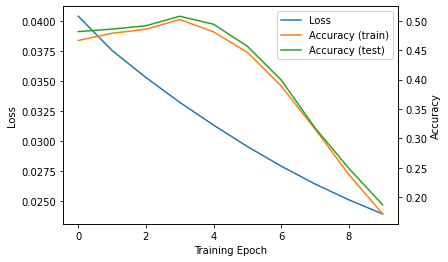

In [ ]:
#not much difference in accuracy to , making the architecure more dense with same paramters

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os



layers = [(75*75*3), 256, 128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.1, 0.1 , 32, 0, ['normal', 1000], 'ELU', 'cross-entropy')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

### Architecture 7

[INFO] epoch = 1, loss = 0.000181, training accuracy = 0.600202, test accuracy = 0.591336
[INFO] epoch = 2, loss = 0.000179, training accuracy = 0.655802, test accuracy = 0.651879
[INFO] epoch = 3, loss = 0.000178, training accuracy = 0.676287, test accuracy = 0.671190
[INFO] epoch = 4, loss = 0.000178, training accuracy = 0.681837, test accuracy = 0.677453
[INFO] epoch = 5, loss = 0.000178, training accuracy = 0.682947, test accuracy = 0.679019
[INFO] epoch = 6, loss = 0.000178, training accuracy = 0.682442, test accuracy = 0.679019
[INFO] epoch = 7, loss = 0.000177, training accuracy = 0.679818, test accuracy = 0.676409
[INFO] epoch = 8, loss = 0.000177, training accuracy = 0.673764, test accuracy = 0.672234
[INFO] epoch = 9, loss = 0.000177, training accuracy = 0.672856, test accuracy = 0.670146
[INFO] epoch = 10, loss = 0.000177, training accuracy = 0.670535, test accuracy = 0.664927
Training Time :  295.3686304092407 seconds
Training set accuracy
0.670534813319879
Test set accurac

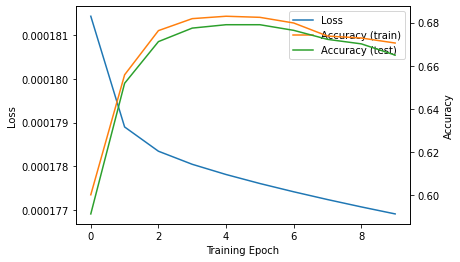

In [ ]:
#Still not good accuracy, not much change in loss in epochs so trying 'sum of squares' losss, with same parameters

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os
from sklearn.externals import  joblib



layers = [(75*75*3),  128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.001, 0.001 , 32, 0, ['normal', 1000], 'ELU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()
joblib.dump(model,"/content/drive/My Drive/Project1/X-Ray/model_chest_xray")
print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

### Architecture 8

[INFO] epoch = 1, loss = 0.000200, training accuracy = 0.533703, test accuracy = 0.531315
[INFO] epoch = 2, loss = 0.000188, training accuracy = 0.634410, test accuracy = 0.633090
[INFO] epoch = 3, loss = 0.000185, training accuracy = 0.622402, test accuracy = 0.623173
[INFO] epoch = 4, loss = 0.000182, training accuracy = 0.585166, test accuracy = 0.581420
[INFO] epoch = 5, loss = 0.000181, training accuracy = 0.541574, test accuracy = 0.534969
[INFO] epoch = 6, loss = 0.000180, training accuracy = 0.514934, test accuracy = 0.509395
[INFO] epoch = 7, loss = 0.000180, training accuracy = 0.501816, test accuracy = 0.487474
[INFO] epoch = 8, loss = 0.000179, training accuracy = 0.492129, test accuracy = 0.470772
[INFO] epoch = 9, loss = 0.000179, training accuracy = 0.480928, test accuracy = 0.450939
[INFO] epoch = 10, loss = 0.000178, training accuracy = 0.476791, test accuracy = 0.442589
Training Time :  297.6908781528473 seconds
Training set accuracy
0.47679112008072655
Test set accur

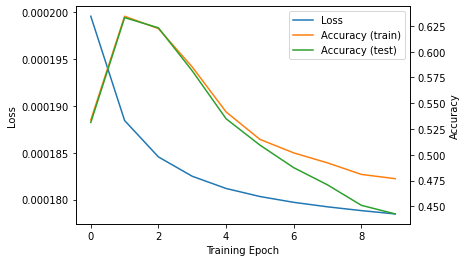

In [ ]:
#much better, accuracy trying with new learning rate to see the diffeence
import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os
from sklearn.externals import  joblib



layers = [(75*75*3),  128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.001, 0.001 , 32, 0, ['normal', 1000], 'ELU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()
joblib.dump(model,"/content/drive/My Drive/Project1/X-Ray/model_chest_xray1")
print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

### Architecture 9

[INFO] epoch = 1, loss = 0.000352, training accuracy = 0.485166, test accuracy = 0.448852
[INFO] epoch = 2, loss = 0.000352, training accuracy = 0.484965, test accuracy = 0.448330
[INFO] epoch = 3, loss = 0.000352, training accuracy = 0.484561, test accuracy = 0.447286
[INFO] epoch = 4, loss = 0.000352, training accuracy = 0.484258, test accuracy = 0.446764
[INFO] epoch = 5, loss = 0.000352, training accuracy = 0.483754, test accuracy = 0.446242
[INFO] epoch = 6, loss = 0.000352, training accuracy = 0.483451, test accuracy = 0.445198
[INFO] epoch = 7, loss = 0.000352, training accuracy = 0.483350, test accuracy = 0.445198
[INFO] epoch = 8, loss = 0.000352, training accuracy = 0.482947, test accuracy = 0.445198
[INFO] epoch = 9, loss = 0.000351, training accuracy = 0.482745, test accuracy = 0.445198
[INFO] epoch = 10, loss = 0.000351, training accuracy = 0.482543, test accuracy = 0.445198
Training Time :  537.9909420013428 seconds
Training set accuracy
0.4825428859737639
Test set accura

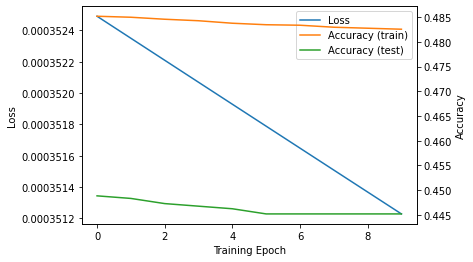

In [ ]:
#Accuracy deoped so making the architecture more dense
import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os
from sklearn.externals import  joblib



layers = [(75*75*3),  256,128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.001, 0.001 , 32, 0, ['normal', 1000], 'ELU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()
joblib.dump(model,"/content/drive/My Drive/Project1/X-Ray/model_chest_xray7")
print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

###Architecture 10

[INFO] epoch = 1, loss = 0.000352, training accuracy = 0.487790, test accuracy = 0.531315
[INFO] epoch = 2, loss = 0.000352, training accuracy = 0.489808, test accuracy = 0.531837
[INFO] epoch = 3, loss = 0.000352, training accuracy = 0.491927, test accuracy = 0.533403
[INFO] epoch = 4, loss = 0.000352, training accuracy = 0.493441, test accuracy = 0.534969
[INFO] epoch = 5, loss = 0.000352, training accuracy = 0.495358, test accuracy = 0.537056
[INFO] epoch = 6, loss = 0.000352, training accuracy = 0.496872, test accuracy = 0.542276
[INFO] epoch = 7, loss = 0.000351, training accuracy = 0.498385, test accuracy = 0.544363
[INFO] epoch = 8, loss = 0.000351, training accuracy = 0.500404, test accuracy = 0.546451
[INFO] epoch = 9, loss = 0.000351, training accuracy = 0.502018, test accuracy = 0.548017
[INFO] epoch = 10, loss = 0.000351, training accuracy = 0.504440, test accuracy = 0.549582
Training Time :  537.5331995487213 seconds
Training set accuracy
0.5044399596367306
Test set accura

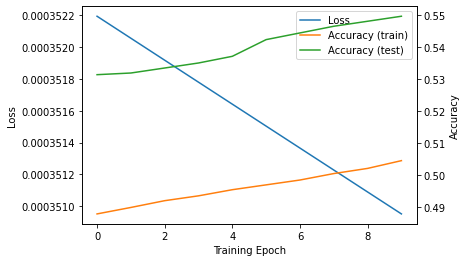

In [ ]:
#Not much change , keeping the loss function and L1 and L2 regularization same using new activation functions
import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os
from sklearn.externals import  joblib



layers = [(75*75*3),  256,128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.001, 0.001 , 32, 0, ['normal', 1000], 'ReLU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()
joblib.dump(model,"/content/drive/My Drive/Project1/X-Ray/model_chest_xray4")
print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

### Architecture 11

[INFO] epoch = 1, loss = 0.003511, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 2, loss = 0.003497, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 3, loss = 0.003483, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 4, loss = 0.003470, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 5, loss = 0.003456, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 6, loss = 0.003442, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 7, loss = 0.003429, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 8, loss = 0.003415, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 9, loss = 0.003402, training accuracy = 1.000000, test accuracy = 1.000000
[INFO] epoch = 10, loss = 0.003388, training accuracy = 1.000000, test accuracy = 1.000000
Training Time :  520.4414622783661 seconds
Training set accuracy
1.0
Test set accuracy
1.0
Val set 

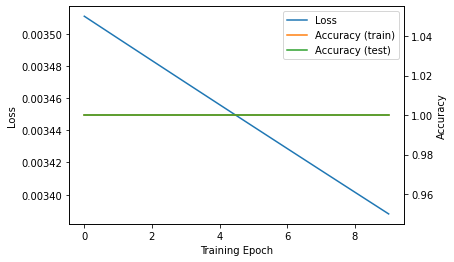

In [ ]:
#Accuracy was good but not best, trying different values of L1 and L2 regularization

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os
from sklearn.externals import  joblib



layers = [(75*75*3),  256,128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.01, 0.01 , 32, 0, ['normal', 1000], 'ReLU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()
joblib.dump(model,"/content/drive/My Drive/Project1/X-Ray/model_chest_xray5")
print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

### Pre-Final Architecture

[INFO] epoch = 1, loss = 0.000184, training accuracy = 0.139657, test accuracy = 0.149269
[INFO] epoch = 2, loss = 0.000181, training accuracy = 0.280727, test accuracy = 0.275574
[INFO] epoch = 3, loss = 0.000180, training accuracy = 0.416549, test accuracy = 0.401357
[INFO] epoch = 4, loss = 0.000179, training accuracy = 0.481635, test accuracy = 0.456681
[INFO] epoch = 5, loss = 0.000179, training accuracy = 0.489707, test accuracy = 0.467641
[INFO] epoch = 6, loss = 0.000179, training accuracy = 0.496670, test accuracy = 0.473904
[INFO] epoch = 7, loss = 0.000178, training accuracy = 0.489304, test accuracy = 0.470251
[INFO] epoch = 8, loss = 0.000178, training accuracy = 0.480727, test accuracy = 0.459812
[INFO] epoch = 9, loss = 0.000178, training accuracy = 0.476892, test accuracy = 0.454593
[INFO] epoch = 10, loss = 0.000178, training accuracy = 0.467911, test accuracy = 0.450418
Training Time :  291.8452582359314 seconds
Training set accuracy
0.4679112008072654
Test set accura

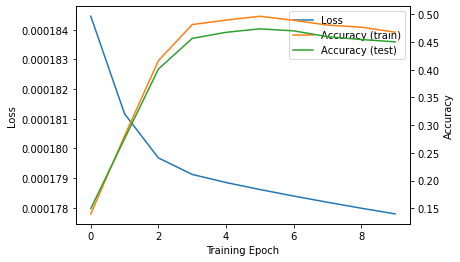

In [ ]:
#Model CLeary overfits as Regularization was changed, trying with only two hidden layers and no regularization

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os
from sklearn.externals import  joblib



layers = [(75*75*3),  128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0, 0. , 32, 0, ['normal', 1000], 'ELU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()
joblib.dump(model,"/content/drive/My Drive/Project1/X-Ray/model_chest_xray6")
print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))

###Final Architecture


[INFO] epoch = 1, loss = 0.000181, training accuracy = 0.600202, test accuracy = 0.591336
[INFO] epoch = 2, loss = 0.000179, training accuracy = 0.655802, test accuracy = 0.651879
[INFO] epoch = 3, loss = 0.000178, training accuracy = 0.676287, test accuracy = 0.671190
[INFO] epoch = 4, loss = 0.000178, training accuracy = 0.681837, test accuracy = 0.677453
[INFO] epoch = 5, loss = 0.000178, training accuracy = 0.682947, test accuracy = 0.679019
[INFO] epoch = 6, loss = 0.000178, training accuracy = 0.682442, test accuracy = 0.679019
[INFO] epoch = 7, loss = 0.000177, training accuracy = 0.679818, test accuracy = 0.676409
[INFO] epoch = 8, loss = 0.000177, training accuracy = 0.673764, test accuracy = 0.672234
[INFO] epoch = 9, loss = 0.000177, training accuracy = 0.672856, test accuracy = 0.670146
[INFO] epoch = 10, loss = 0.000177, training accuracy = 0.670535, test accuracy = 0.664927
Training Time :  295.3686304092407 seconds
Training set accuracy
0.670534813319879
Test set accurac

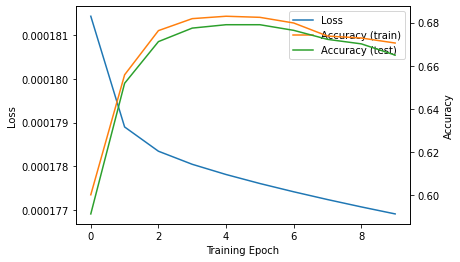

In [ ]:
#Using the best results

import time
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
import csv
import os
from sklearn.externals import  joblib



layers = [(75*75*3),  128, 16, 2]
model = FeedforwardNeuralNetwork(layers, 0.01, 'none', 0.001, 0.001 , 32, 0, ['normal', 1000], 'ELU', 'sum-of-squares')
start_time = time.time()
model.fit(trainX,trainY,testX,testY, 10 ,1)
end_time = time.time()

#Saving the model to be used further
joblib.dump(model,"/content/drive/My Drive/Project1/X-Ray/model_chest_xray")
print('Training Time : ', end_time-start_time, 'seconds')

print("Training set accuracy")
trainY = LabelBinarizer().fit_transform(trainY)
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(accuracy_score(trainY, predictedY))

print("Test set accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(accuracy_score(testY, predictedY))


print("Val set accuracy")
valY = LabelBinarizer().fit_transform(valY)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(accuracy_score(valY, predictedY))